In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

In [3]:
full = pd.concat([train,test])

In [4]:
full.shape

(1309, 12)

In [5]:
train.shape

(891, 12)

In [6]:
test.shape

(418, 11)

In [7]:
full.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [8]:
def percentage(numerator, denomenator):
    
    if type(numerator) == pd.core.series.Series:
        return (numerator/denomenator*100).map('{:.1f}%'.format)
    
    elif type(numerator) == int or type(numerator) == float:
        return '{:.1f}%'.format(float(numerator)/float(denomenator)*100) 
    
    else:
        print("check type")

In [9]:
percentage(full.count()-1,full.shape[0]-1)

Age             79.9%
Cabin           22.5%
Embarked        99.8%
Fare            99.9%
Name           100.0%
Parch          100.0%
PassengerId    100.0%
Pclass         100.0%
Sex            100.0%
SibSp          100.0%
Survived        68.0%
Ticket         100.0%
dtype: object

In [10]:
cabin_list = full[full.Cabin.notnull()]["Cabin"].tolist()

In [11]:
cabin_list[:5]

['C85', 'C123', 'E46', 'G6', 'C103']

In [12]:
full[full.Cabin.notnull()].groupby('Pclass')['Pclass'].count()  #Most of recorded cabin no came from First CLass.

Pclass
1    256
2     23
3     16
Name: Pclass, dtype: int64

In [13]:
train[train.Cabin.notnull()].groupby(['Pclass','Survived'])['Cabin'].count()  #Given a Cabin number increases your survival. First CLass had most surviviors.

Pclass  Survived
1       0            59
        1           117
2       0             3
        1            13
3       0             6
        1             6
Name: Cabin, dtype: int64

In [14]:
full = full.drop('Cabin',1)

In [15]:
#Now checking the Nan columns with less <1% null values.

In [16]:
full[full.Embarked.isnull()]  #Both have same ticket number. Let's Check.

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [17]:
full['ticket_prefix'] = full.Ticket.str.extract("([a-zA-Z0-9]{3})", expand=False)
full.groupby(['ticket_prefix','Embarked'])['Ticket'].count().head(15)  
#Checking whether Ticket numbers were alloted according to passenger's embarkment. But NOPE. 
#But ticket_prefix '113' has most of the S embarkment.We can impute this value to missing values in embarked.

ticket_prefix  Embarked
104            S            1
110            C            2
               S           11
111            C            4
               S            5
112            C            5
               S            9
113            C           10
               S           54
116            S            3
117            C           10
               S            8
118            C            2
119            C            2
122            S            2
Name: Ticket, dtype: int64

In [18]:
full.groupby(['Sex','ticket_prefix','Pclass','Embarked'])['Ticket'].count().head(15)
#In 113 S is highest.

Sex     ticket_prefix  Pclass  Embarked
female  110            1       C            1
                               S            5
        111            1       C            2
        112            1       C            3
                               S            2
        113            1       C            4
                               S           15
        116            2       S            1
        117            1       C            6
                               S            6
        118            1       C            2
        119            1       C            1
        127            1       S            3
        132            1       C            1
        135            1       C            3
Name: Ticket, dtype: int64

In [19]:
full.groupby(['Sex','Pclass','Embarked'])['Ticket'].count().head(15)
#But here you can see if we impute we will get C as it is 71 than S which is 69.Which is "most probably" wrong.

Sex     Pclass  Embarked
female  1       C            71
                Q             2
                S            69
        2       C            11
                Q             2
                S            93
        3       C            31
                Q            56
                S           129
male    1       C            70
                Q             1
                S           108
        2       C            17
                Q             5
                S           149
Name: Ticket, dtype: int64

In [20]:
full.set_value(61,'Embarked','S')
full.set_value(829,'Embarked','S')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,ticket_prefix
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,211
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,175
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,STO
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,113
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,373
5,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,330
6,54.0,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,174
7,2.0,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,349
8,27.0,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,347
9,14.0,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,237


In [21]:
full[full.Embarked.isnull()]
#Double checking. Its all good.\

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,ticket_prefix


In [22]:
#Examining Fare now.
full[full.Fare.isnull()]

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,ticket_prefix
152,60.5,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701,370


In [23]:
#Examining Fare by getting info about Passengers with preix=370.
full[full.ticket_prefix=='370'].groupby(['Sex','Pclass','Parch','SibSp'])['Fare'].describe()
#We can see that fare for Male in Class 3 with 0 parch and 0 sibsp have fare =7.75.

count     mean  std      min      25%      50%  \
Sex    Pclass Parch SibSp                                                   
female 3      0     0        4.0   7.7500  0.0   7.7500   7.7500   7.7500   
                    1        2.0  15.5000  0.0  15.5000  15.5000  15.5000   
              1     1        1.0  20.2125  NaN  20.2125  20.2125  20.2125   
              2     0        1.0  20.2125  NaN  20.2125  20.2125  20.2125   
male   3      0     0        5.0   7.7500  0.0   7.7500   7.7500   7.7500   
                    1        2.0  15.5000  0.0  15.5000  15.5000  15.5000   
              1     1        1.0  20.2125  NaN  20.2125  20.2125  20.2125   

                               75%      max  
Sex    Pclass Parch SibSp                    
female 3      0     0       7.7500   7.7500  
                    1      15.5000  15.5000  
              1     1      20.2125  20.2125  
              2     0      20.2125  20.2125  
male   3      0     0       7.7500   7.7500  
                    1      15.5000  15.5000  
              1     1      20.2125  20.2125

In [24]:
full.set_value(152,'Fare',7.75);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.


In [25]:
#We will now fill age. But let us check that first name may give us any hint.
full['Title'] = full.Name.str.extract("(.*, )([^\.]+)",expand=False)[1]
full.groupby(['Sex','Title'])['Name'].count()

Sex     Title       
female  Dona              1
        Dr                1
        Lady              1
        Miss            260
        Mlle              2
        Mme               1
        Mrs             197
        Ms                2
        the Countess      1
male    Capt              1
        Col               4
        Don               1
        Dr                7
        Jonkheer          1
        Major             2
        Master           61
        Mr              757
        Rev               8
        Sir               1
Name: Name, dtype: int64

In [26]:
#Converting rare title into simple categories.
full.loc[full.Title=='Mlle','Title'] = 'Miss'
full.loc[full.Title=='Mme','Title'] = 'Mrs'
full.loc[~full.Title.isin(['Miss','Mrs','Mr','Master']),'Title'] = 'Rare'

In [27]:
full.groupby(['Title','Survived'])['Name'].count()
#Checking survivorship.
#We can conclude that females and children were "most" of the survivors.
#And yet in this era they talk about Gender Discrimination. Meh. :(

Title   Survived
Master  0.0          17
        1.0          23
Miss    0.0          55
        1.0         129
Mr      0.0         436
        1.0          81
Mrs     0.0          26
        1.0         100
Rare    0.0          15
        1.0           9
Name: Name, dtype: int64

In [28]:
full.groupby('Title')['Age'].median()

Title
Master     4.0
Miss      22.0
Mr        29.0
Mrs       35.0
Rare      47.0
Name: Age, dtype: float64

In [29]:
full.groupby(['Title','Pclass'])['Age'].mean()

Title   Pclass
Master  1          6.984000
        2          2.757273
        3          6.090000
Miss    1         30.131148
        2         20.717083
        3         17.360874
Mr      1         41.450758
        2         32.346715
        3         28.318910
Mrs     1         42.926471
        2         33.518519
        3         32.326531
Rare    1         47.666667
        2         39.545455
        3               NaN
Name: Age, dtype: float64

In [30]:
full.groupby('Title')['Age'].std()

Title
Master     4.161554
Miss      12.192794
Mr        12.422089
Mrs       12.902087
Rare      11.362587
Name: Age, dtype: float64

In [31]:
full.groupby(['Title','Pclass'])['Age'].median()
#See the pattern that increasing class results in decreasing age(except Master).

Title   Pclass
Master  1          6.0
        2          2.0
        3          6.0
Miss    1         30.0
        2         20.0
        3         18.0
Mr      1         41.5
        2         30.0
        3         26.0
Mrs     1         45.0
        2         30.5
        3         31.0
Rare    1         48.5
        2         41.0
        3          NaN
Name: Age, dtype: float64

In [32]:
full[full.Age.isnull()].head(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,ticket_prefix,Title
5,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,330,Mr
17,NaN,S,13.0000,"Williams, Mr. Charles Eugene",0,18,2,male,0,1.0,244373,244,Mr
19,NaN,C,7.2250,"Masselmani, Mrs. Fatima",0,20,3,female,0,1.0,2649,264,Mrs
26,NaN,C,7.2250,"Emir, Mr. Farred Chehab",0,27,3,male,0,0.0,2631,263,Mr
28,NaN,Q,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,3,female,0,1.0,330959,330,Miss
29,NaN,S,7.8958,"Todoroff, Mr. Lalio",0,30,3,male,0,0.0,349216,349,Mr
31,NaN,C,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,1,female,1,1.0,PC 17569,175,Mrs
32,NaN,Q,7.7500,"Glynn, Miss. Mary Agatha",0,33,3,female,0,1.0,335677,335,Miss
36,NaN,C,7.2292,"Mamee, Mr. Hanna",0,37,3,male,0,1.0,2677,267,Mr
42,NaN,C,7.8958,"Kraeff, Mr. Theodor",0,43,3,male,0,0.0,349253,349,Mr


In [33]:
fullv22 = full.copy()

In [34]:
age_fill = full.groupby(['Title','Pclass'])['Age'].mean().to_frame()

In [35]:
age_fill = age_fill.reset_index()      
#Because before doing this Title and Pclass were being used as index and not as records.

In [36]:
#Filling the null values in Age column using mean values according to their Title and Pclass.
for index in fullv22[fullv22.Age.isnull()].index:
    mean = age_fill[(age_fill.Title == fullv22.iloc[index]['Title'])& \
                    (age_fill.Pclass == fullv22.iloc[index]['Pclass'])]['Age'].values[0]
    fullv22.set_value(index,'Age',mean)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


In [37]:
fullv22.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,ticket_prefix,Title
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,211,Mr
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,175,Mrs
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,STO,Miss
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,113,Mrs
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,373,Mr


In [38]:
fullv211 = fullv22.copy()

In [39]:
fullv211.Sex = fullv211.Sex.map({'male':1,'female':0})

In [40]:
fullv211.Title = fullv211.Title.map({'Master':0,'Miss':1,'Mr':2,'Mrs':3,'Rare':4}).astype(np.int)

In [41]:
fullv211.Embarked = fullv211.Embarked.map({'S':0,'C':1,'Q':2}).astype(np.int)

In [42]:
fullv22 = fullv211.drop(['Name','Ticket','ticket_prefix'],axis=1)

In [43]:
fullv22.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Title
0,22.0,0,7.2500,0,1,3,1,1,0.0,2
1,38.0,1,71.2833,0,2,1,0,1,1.0,3
2,26.0,0,7.9250,0,3,3,0,0,1.0,1
3,35.0,0,53.1000,0,4,1,0,1,1.0,3
4,35.0,0,8.0500,0,5,3,1,0,0.0,2


In [44]:
labels = fullv22[0:891]['Survived'].tolist()
train = fullv22[0:891].drop("Survived",1)
test = fullv22[891:].drop("Survived",1)

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(train,labels,train_size=0.7,test_size=0.3,random_state=13)

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from time import time

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
'''
grid_times = {}
model = RandomForestClassifier(random_state=13)

features = x_train.columns.drop('PassengerId',1)

for num in np.arange(2,600,50):
    
    param = np.arange(1,num,10)
    param_grid = {'n_estimators':param, 'criterion':['gini','entropy']}
    
    grid_search = GridSearchCV(model,param_grid=param_grid)
    
    t0 = time()
    grid_search.fit(x_train[features],y_train)
    compute_time = time() - t0
    grid_times[len(grid_search.grid_scores_)] = time() - t0
grid_times = pd.DataFrame.from_dict(grid_times,orient='index')
'''

In [49]:
grid_times

,0
2,0.058559
12,2.207325
22,7.276499
32,15.261449
42,26.297760
52,40.543836
62,57.465061
72,77.432385
82,100.258827
92,126.855319


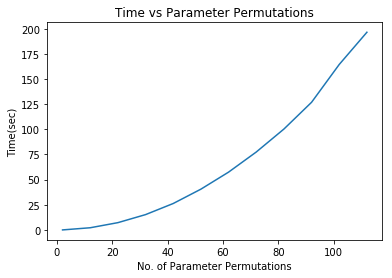

In [50]:
final = pd.DataFrame.from_dict(grid_times)
final = final.sort_index()
plt.plot(final.index.values, final[0])
plt.xlabel('No. of Parameter Permutations')
plt.ylabel('Time(sec)')
plt.title('Time vs Parameter Permutations')

In [51]:
def eval_param(parameter, num_range, index):
    grid_search = GridSearchCV(model, param_grid={parameter: num_range})
    grid_search.fit(x_train[features], y_train)
    
    df = {}
    for i,score in enumerate(grid_search.grid_scores_):
        df[score[0][parameter]] = score[1]
        
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0,inplace=True)
    df = df.sort_values(by='index')
    
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df
    

In [56]:
param_grid = {
                "n_estimators":np.arange(2,300,2),
                "max_depth": np.arange(1,28,1),
                "min_samples_split": np.arange(2,150,1),
                "min_samples_leaf": np.arange(1,60,1),
                "max_leaf_nodes": np.arange(2,60,1),
                "min_weight_fraction_leaf": np.arange(0.1,0.4,0.1)
}

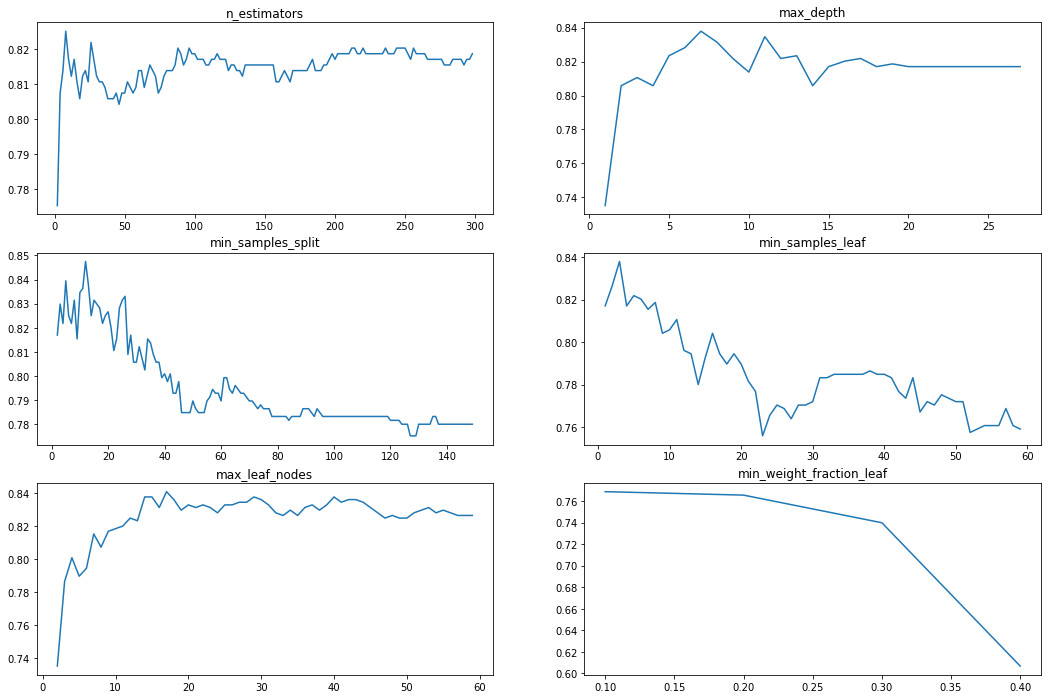

In [57]:
index =1
plt.figure(figsize=(18,12))
for parameter,param_range in dict.items(param_grid):
    eval_param(parameter, param_range, index)
    index += 1

In [58]:
from operator import itemgetter

# Utility function to report best scores
def report(grid_scores, n_top):
    top_scores = sorted(grid_scores, key=itemgetter(1), reverse=True)[:n_top]
    for i, score in enumerate(top_scores):
        print("Model with rank: {0}".format(i + 1))
        print("Mean validation score: {0:.4f})".format(
              score.mean_validation_score,
              np.std(score.cv_validation_scores)))
        print("Parameters: {0}".format(score.parameters))
        print("")

In [59]:
# parameters for GridSearchCV
param_grid2 = {"n_estimators": [8,10,15,20,25],
              "max_depth": [3, 5,7,11],
              "min_samples_split": [10,12,25],
              "min_samples_leaf": [2,3,5,11,16],
              "max_leaf_nodes": [15,17,18,20,30,40],
              "min_weight_fraction_leaf": [0.1]}

In [60]:
grid_search = GridSearchCV(model,param_grid=param_grid2)
grid_search.fit(x_train[features],y_train)

report(grid_search.grid_scores_,4)

Model with rank: 1
Mean validation score: 0.8010)
Parameters: {'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10}

Model with rank: 2
Mean validation score: 0.8010)
Parameters: {'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 2, 'min_samples_split': 12, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10}

Model with rank: 3
Mean validation score: 0.8010)
Parameters: {'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 2, 'min_samples_split': 25, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10}

Model with rank: 4
Mean validation score: 0.8010)
Parameters: {'max_depth': 3, 'max_leaf_nodes': 15, 'min_samples_leaf': 3, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 10}



In [61]:
param_grid3 = {"n_estimators": [5, 40, 42],
              "max_depth": [5, 6],
              "min_samples_split": [5, 10],
              "min_samples_leaf": [3, 5],
              "max_leaf_nodes": [14, 15]}

In [62]:
grid_search = GridSearchCV(model,param_grid=param_grid3)
grid_search.fit(x_train[features],y_train)

report(grid_search.grid_scores_,4)

Model with rank: 1
Mean validation score: 0.8331)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 40}

Model with rank: 2
Mean validation score: 0.8331)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 42}

Model with rank: 3
Mean validation score: 0.8315)
Parameters: {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 42}

Model with rank: 4
Mean validation score: 0.8315)
Parameters: {'max_depth': 5, 'max_leaf_nodes': 14, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 42}



In [63]:
model = RandomFormodel = RandomForestClassifier(n_estimators=42,max_depth=5,min_samodel = RandomFormodel = RandomForestClassifier(n_estimators=42,max_depth=5,min_samples_leaf=5,min_samples_split=10,max_leaf_nodes=14,random_state=13)estClassifier(n_estimators=42,max_depth=5,min_samples_leaf=5,min_samples_split=10,max_leaf_nodes=14,random_state=13)mples_leaf=5,min_samples_split=10,max_leaf_nodes=14,random_state=13)estClassifier(n_estimators=42,max_depth=5,min_samples_leaf=5,min_samples_split=10,max_leaf_nodes=14,random_state=13)

In [64]:
model.fit(train[features],labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=14,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=42, n_jobs=1,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [69]:
preds = model.predict(test[features])

output = pd.DataFrame(test['PassengerId'])
output['Survived'] = preds.astype(np.int)
output.to_csv('titanic_prediction.csv',index=False)

In [126]:
#Accuracy = 81.339.
#Rank = 545/9338. :)

In [129]:
param_grid4 = {
              "n_estimators": [5,10,20,25,30,35,90,210],
              "max_depth": [6],
              "min_samples_split": [5],
              "min_samples_leaf": [3],
              "max_leaf_nodes": [14],
            #min_weight_fraction_leaf": [0.1]  this bastard coused all the low accuracy :(
}

In [125]:
'''grid_search = GridSearchCV(model,param_grid=param_grid4)
grid_search.fit(x_train[features],y_train)

report(grid_search.grid_scores_,5)'''

Model with rank: 1
Mean validation score: 0.7865)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 2, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.7865)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 2, 'min_samples_split': 7, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}

Model with rank: 3
Mean validation score: 0.7865)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 2, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}

Model with rank: 4
Mean validation score: 0.7865)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 2, 'min_samples_split': 9, 'min_weight_fraction_leaf': 0.1, 'n_estimators': 100}

Model with rank: 5
Mean validation score: 0.7865)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 2, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.1, 'n_est

In [130]:
grid_search = GridSearchCV(model,param_grid=param_grid4)
grid_search.fit(x_train[features],y_train)

report(grid_search.grid_scores_,5)

Model with rank: 1
Mean validation score: 0.8331)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 25}

Model with rank: 2
Mean validation score: 0.8315)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 90}

Model with rank: 3
Mean validation score: 0.8299)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 35}

Model with rank: 4
Mean validation score: 0.8299)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 210}

Model with rank: 5
Mean validation score: 0.8283)
Parameters: {'max_depth': 6, 'max_leaf_nodes': 14, 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 30}



In [131]:
model = RandomForestClassifier(n_estimators=90,max_depth=6,min_samples_leaf=3,min_samples_split=5,max_leaf_nodes=14,random_state=13)
model.fit(train[features],labels)
predv2 = model.predict(test[features])

In [138]:
outputv2 = pd.DataFrame(test['PassengerId'])
outputv2['Survived'] = predv2.astype(np.int)
outputv2.to_csv('titanic_predictionv2.csv',index=False)
#Acc : 80.382

In [140]:
model = RandomForestClassifier(n_estimators=25,max_depth=6,min_samples_leaf=3,min_samples_split=5,max_leaf_nodes=14,random_state=13)
model.fit(train[features],labels)
predv3 = model.predict(test[features])

In [141]:
outputv3 = pd.DataFrame(test['PassengerId'])
outputv3['Survived'] = predv3.astype(np.int)
outputv3.to_csv('titanic_predictionv3.csv',index=False)
#Acc : 79.9904

In [142]:
model = RandomForestClassifier(n_estimators=35,max_depth=6,min_samples_leaf=3,min_samples_split=5,max_leaf_nodes=14,random_state=13)
model.fit(train[features],labels)
predv4 = model.predict(test[features])

In [143]:
outputv4 = pd.DataFrame(test['PassengerId'])
outputv4['Survived'] = predv4.astype(np.int)
outputv4.to_csv('titanic_predictionv4.csv',index=False)
#Acc : 79.425

In [144]:
model = RandomFormodel = RandomForestClassifier(n_estimators=42,max_depth=6,min_samples_leaf=3,min_samples_split=5,max_leaf_nodes=14,random_state=13)
model.fit(train[features],labels)
predv5 = model.predict(test[features])

In [145]:
outputv5 = pd.DataFrame(test['PassengerId'])
outputv5['Survived'] = predv5.astype(np.int)
outputv5.to_csv('titanic_predictionv5.csv',index=False)
#Acc : 80.382

In [ ]:
'''
Best Parameters - 
    n_estimators = 42
    max_depth = 5
    min_samples_leaf = 5
    min_samples_split = 5
    criterion = gini
    max_leaf_nodes =  14
    And for more accuracy you can play with the "Cabin" column and for more tuning the parameters you can check
     - max_features
     
     ~~ END ~~
'''